In [12]:
import torch

import matplotlib.pyplot as plt

from muutils.nbutils.configure_notebook import configure_notebook

from maze_dataset import MazeDataset, MazeDatasetConfig, LatticeMazeGenerators
from maze_dataset.plotting import MazePlot, PathFormat

from maze_transformer.training.config import ZanjHookedTransformer
from maze_transformer.evaluation.load_model_testdata import load_model_with_test_data
from maze_transformer.evaluation.plotting import plot_predicted_paths


In [2]:
# Setup (we won't be training any models)
DEVICE: torch.device = configure_notebook(seed=42, dark_mode=False)
print(f"{DEVICE = }")
torch.set_grad_enabled(False)

DEVICE = device(type='cuda')


In [10]:
MODEL: ZanjHookedTransformer; DATASET: MazeDataset
MODEL, DATASET = load_model_with_test_data(
	# model_path="../examples/wandb.jerpkipj.zanj",
	# model_path="../examples/model.hallway-insto.final.zanj",
	model_path="../examples/model.hallway-insto.v17.zanj",
	# dataset_cfg_source=None,
	dataset_cfg_source=MazeDatasetConfig(
		name="default",
		grid_n=6,
		n_mazes=1,
		maze_ctor=LatticeMazeGenerators.gen_dfs,
		# maze_ctor_kwargs=dict(do_forks=False),
	),
	n_examples=100,
)

loaded model with 1.2M params (num_params = 1234735) from
../examples/model.hallway-insto.v17.zanj
original model name: 'model.zanj_model_config.name = 'hallway-medium'', changing to 'model.hallway-insto.v17'
loaded dataset with 100 examples
dataset.cfg.summary() = {'name': 'default', 'fname': 'default-g6-n100-a_dfs-h44464', 'sdc_hash': 9205647201718300888895351229596809369185347415924889256002510411645131444464, 'seed': 42, 'seq_len_min': 1, 'seq_len_max': 512, 'applied_filters': [], 'grid_n': 6, 'grid_shape': (6, 6), 'n_mazes': 100, 'maze_ctor_name': 'gen_dfs', 'maze_ctor_kwargs': {}}


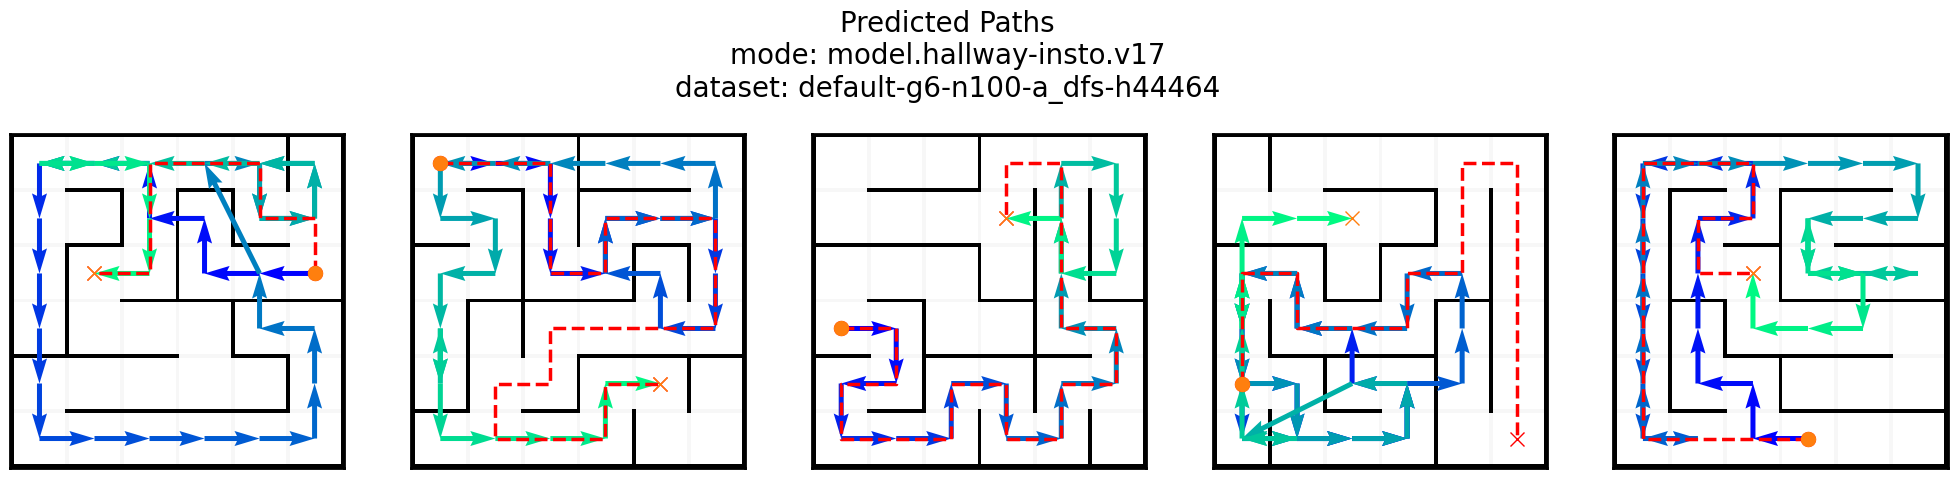

In [19]:
fig, ax = plot_predicted_paths(
	MODEL, 
	DATASET, 
	n_mazes=5, 
	max_new_tokens=50, 
	row_length=5, 
	figsize_scale=5,
	predicted_path_fmt=PathFormat(cmap="winter"),
	show=False,
)
fig.suptitle(f"Predicted Paths\nmode: {MODEL.config.name}\ndataset: {DATASET.cfg.to_fname()}", fontsize=20)
# make the figure taller
fig.set_figheight(fig.get_figheight() + 1)
plt.show()

